# Mathematik 6 - Faltung

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Mit dem __Skalarprodukt__ und dem __äußeren Produkt__ existieren zwei Möglichkeiten, Vektoren sinnvoll miteinander zu multiplizieren. Beim Skalarprodukt entsteht dabei ein Skalar, beim äußeren Produkt eine Matrix (ein _Tensor 2. Stufe_). Beide Produkte finden in der Mathematik der Neuronalen Netze ihre Anwendung, und sie werden von der Bibliothek __NumPy__ direkt unterstützt:

In [2]:
v = [1,2,3,4]
w = [0,9,-3,1]

print(f'Skalarprodukt: \n{np.dot(v,w)=}')
print(f'Tensorprodukt: \n{np.outer(v,w)=}')

Skalarprodukt: 
np.dot(v,w)=13
Tensorprodukt: 
np.outer(v,w)=array([[  0,   9,  -3,   1],
       [  0,  18,  -6,   2],
       [  0,  27,  -9,   3],
       [  0,  36, -12,   4]])


### Eine weitere Multiplikation

Es existiert noch eine dritte Möglichkeit, zwei Vektoren miteinander zu verknüpfen. Sind $v = (v_1,\ldots,v_M)$ und $w = (w_1,\ldots,w_N)$ zwei Vektoren, so nennt man das Produkt

$$  (v \ast w)_n := \sum_k v_k w_{n - k} $$

die __Faltung__ der Vektoren $v$ und $w$, engl.: __Convolution__. 

Auch diese Operation wird von NumPy unterstützt:

In [3]:
print(f'Faltungsprodukt: \n{np.convolve(v,w)=}')

Faltungsprodukt: 
np.convolve(v,w)=array([ 0,  9, 15, 22, 29, -9,  4])


### Was macht die Faltung?

Die Faltung bildet wieder eine gewichtete Summe, ähnlich dem Skalarprodukt, bezeiht dabei aber einen größeren Bereich ein. Dabei wird ein Vektor umgedreht über einen weiteren, größeren Vektor geschoben und diese beiden Bereiche dann skalr multipliziert. Der Skalar bildet dann eine Komponente des Faltungsprodukts. Der Vorgang kann auch als Filterung betrachtet werden; der kleiner Vektor wird als __Filterkern__ bezeichnet. Dabei ist man bei der faltung nicht nur auf eindimensionale Vektoren beschränkt; insbesondere bei der Bildverarbeitung arebiett man mit Matrizen.

Die faltung ist in vielen Bereichen eine wertvolles Hilfsmittel, vor allem in der __Signal- und Bildverarbeitung__. Sie steht in engem Zusammenhang mit der __Fourier-Transformation__.

### Beispiele für Faltungen

Wir definieren einmal einige Filterkerne: den _Rechteck-Filter__, den __Glättungs-Filter__ und den __Kantenfilter__, und einge Signale dazu

In [4]:
rechteck_filter = [0,1,1,1,0]
glaettungs_filter = np.array([1., 1. , 1.]) / 3
kanten_filter = [1,-2,1]

spitze = [0,0,0,1,2,1,0,0,0]
rechteck = [0,0,0,1,1,1,1,1,0,0,0]

Wir wenden nun die Filter auf einige Signale an:

Glättung: [0.  0.  0.  0.3 1.  1.3 1.  0.3 0.  0.  0. ]
Glättung: [0.  0.  0.  0.3 0.7 1.  1.  1.  0.7 0.3 0.  0.  0. ]
Kantendetektion: [ 0  0  0  1 -1  0  0  0 -1  1  0  0  0]


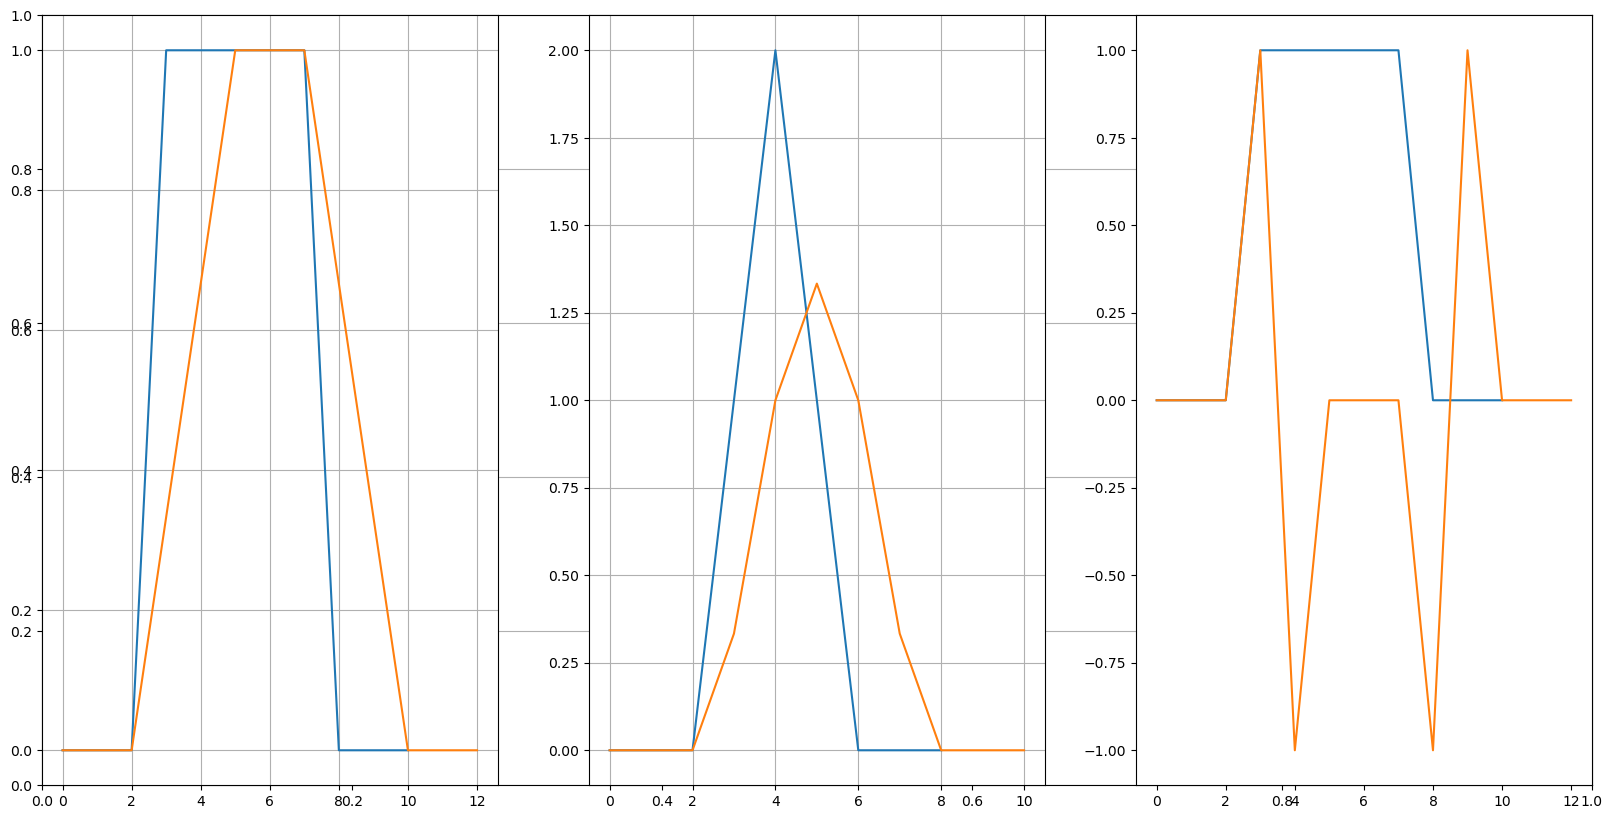

In [5]:
print(f'Glättung: {np.convolve(glaettungs_filter,spitze).round(1)}')
print(f'Glättung: {np.convolve(glaettungs_filter,rechteck).round(1)}')
print(f'Kantendetektion: {np.convolve(kanten_filter,rechteck)}')

examples= [ [glaettungs_filter,rechteck],[glaettungs_filter,spitze],[kanten_filter,rechteck] ]

plt.figure(figsize=(20, 10))

for n, example in enumerate(examples): 
    filter, data = example
    res = np.convolve(filter,data)
    plt.grid()
    plt.subplot(1,len(examples),n+1)
    plt.plot([x for x in range(len(data))] ,data)
    plt.plot([x for x in range(len(res))] ,res)

plt.show()

#### Links

https://de.wikipedia.org/wiki/Faltung_(Mathematik)